# Proyecto del Día 17: Dashboard de Terremotos a Nivel Mundial

Bienvenido al proyecto del día de hoy, donde vas a crear un **dashboard interactivo utilizando Plotly y Dash**. En este proyecto, trabajarás con datos reales de terremotos, que podrás descargar de los archivos adjuntos de esta lección.

Con esa información vas a desarrollar un conjunto de visualizaciones interactivas que proporcionen una comprensión profunda de los patrones y tendencias de los terremotos. Este ejercicio te permitirá aplicar tus conocimientos adquiridos sobre visualización de datos y desarrollo de dashboards con herramientas de Python.

El dataset contiene información detallada sobre terremotos, incluyendo:
+ fecha y hora del evento
+ magnitud
+ profundidad
+ país en el que ocurrió.

Utilizarás esta información para crear varios gráficos interactivos que te ayudarán a explorar y presentar los datos de manera efectiva.

### Consigna

Tu tarea es desarrollar un dashboard interactivo utilizando **Plotly** y **Dash** para visualizar los datos de terremotos proporcionados en el archivo `earthquake data.csv`. 

Asegúrate de que el dashboard tenga un diseño limpio y organizado, con títulos claros y descripciones para cada gráfico.

### Pasos para Completar el Proyecto

1. **Cargar y Preparar los Datos**: Carga el archivo `earthquake data.csv` y realiza las transformaciones necesarias, como convertir la columna de fecha y hora al formato datetime.

2. **Creación de Gráficos**: Crea los siguientes gráficos usando plotly:
    + **Mapa Coroplético**: Un mapa coroplético que muestre la densidad de terremotos por región.
    + **Gráfico de Barras**: Un gráfico de barras que muestre el número de terremotos por magnitud.
    + **Gráfico de Líneas**: Un gráfico de líneas que muestre la tendencia de la magnitud de los terremotos a lo largo del tiempo.
    + **Gráfico de Dispersión**: Un gráfico de dispersión que muestre la relación entre la magnitud de los terremotos y su profundidad.
    + **Gráfico 3D**: Un gráfico 3D que visualice la relación entre magnitud, profundidad y tiempo.

3. **Diseño de la Aplicación**: Usando Dash, crea la aplicación con el Layout del Dashboard, en el que deben desplegarse todos los gráficos que has preparado. Finalmente ejecuta la aplicación.


Ten en cuenta que la información entra por los ojos, por lo que sería bueno que agregues parámetros de formato a cada gráfico para mejorar su apariencia y usabilidad. Piensa en colores, tamaños de marcadores, etiquetas de texto y cualquier otra personalización que haga los gráficos más informativos y atractivos. No te limites a lo enseñado en las lecciones y atrévete a explorar parámetros adicionales.

**¡Buena suerte y diviértete creando tu dashboard interactivo de terremotos!**

In [104]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px 
import dash
from dash import dcc, html

In [95]:
df = pd.read_csv("earthquake_data.csv")

In [96]:
df

Date & Time  Latitude  Longitude  Depth  Magnitude  \
0      11/21/2023 16:36  38243.00   38808.00      7        1.0   
1      11/21/2023 15:59  39134.00   29026.00     10        1.0   
2      11/21/2023 13:00  39636.00   30104.00      7        1.0   
3      11/20/2023 18:43  47368.00    6918.00      5        1.0   
4      11/19/2023 10:48  37175.00   36892.00      7        1.0   
...                 ...       ...        ...    ...        ...   
52762   8/28/2023 19:55  -6831.00  116566.00    514        7.1   
52763    5/20/2023 1:51    -22.94     170.56     30        7.1   
52764    7/16/2023 6:48  54527.00 -160842.00     30        7.2   
52765   6/15/2023 18:06    -23.02    -177.16    160        7.2   
52766    5/19/2023 2:57    -23.13     170.86     20        7.7   

                        Lands      Country  
0                     EASTERN       TURKEY  
1                     WESTERN       TURKEY  
2                     WESTERN       TURKEY  
3                 SWITZERLAND  SWITZERLAND  
4                     CENTRAL       TURKEY  
...                       ...          ...  
52762                    BALI          SEA  
52763  SOUTHEAST, OF, LOYALTY      ISLANDS  
52764                  ALASKA    PENINSULA  
52765         SOUTH, OF, FIJI      ISLANDS  
52766  SOUTHEAST, OF, LOYALTY      ISLANDS  

[52767 rows x 7 columns]

In [10]:
#Realizo cambio las fechas a formato datetime
df["Date & Time"] = pd.to_datetime(df["Date & Time"], format="%m/%d/%Y %H:%M")

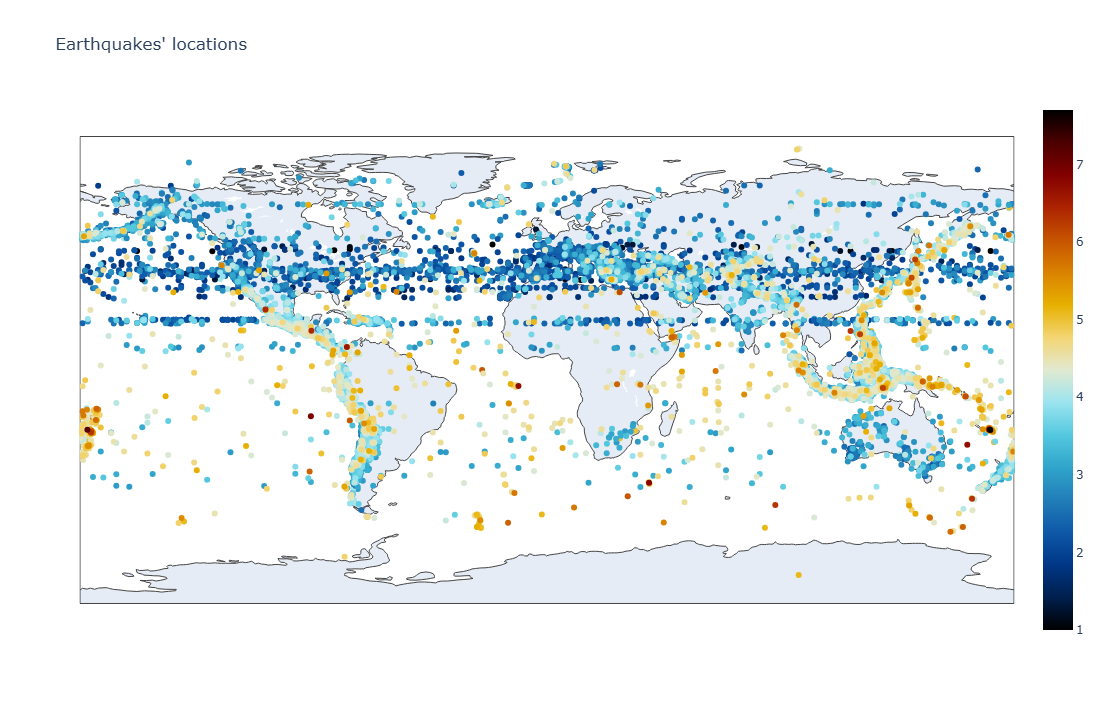

In [44]:
fig1 = go.Figure()
map_data = go.Scattergeo(
    lon = df["Longitude"],
    lat = df["Latitude"],
    text = df["Magnitude"],
    mode = "markers",
    marker = dict(color=df["Magnitude"],
                 colorscale="IceFire",
                 showscale=True)
)

fig1.add_trace(map_data)
layout = go.Layout(
    title= "Earthquakes' locations",
    xaxis_title =  "Longitude",
    yaxis_title =  "Latitude",
    width=1024, 
    height=720)

fig1.update_layout(layout)


In [42]:
df_mean_magnitude = df.groupby(by="Country", as_index=False)["Magnitude"].mean()
df_mean_magnitude

Country  Magnitude
0    (SAK'ART'VELO)   3.189655
1              ADEN   4.717857
2       AFGHANISTAN   4.475000
3            AFRICA   3.471212
4           ALABAMA   2.300000
..              ...        ...
181          XIZANG   4.089362
182            YORK   2.266667
183          ZAMBIA   4.700000
184         ZEALAND   3.482255
185          ZEMLYA   4.425000

[186 rows x 2 columns]

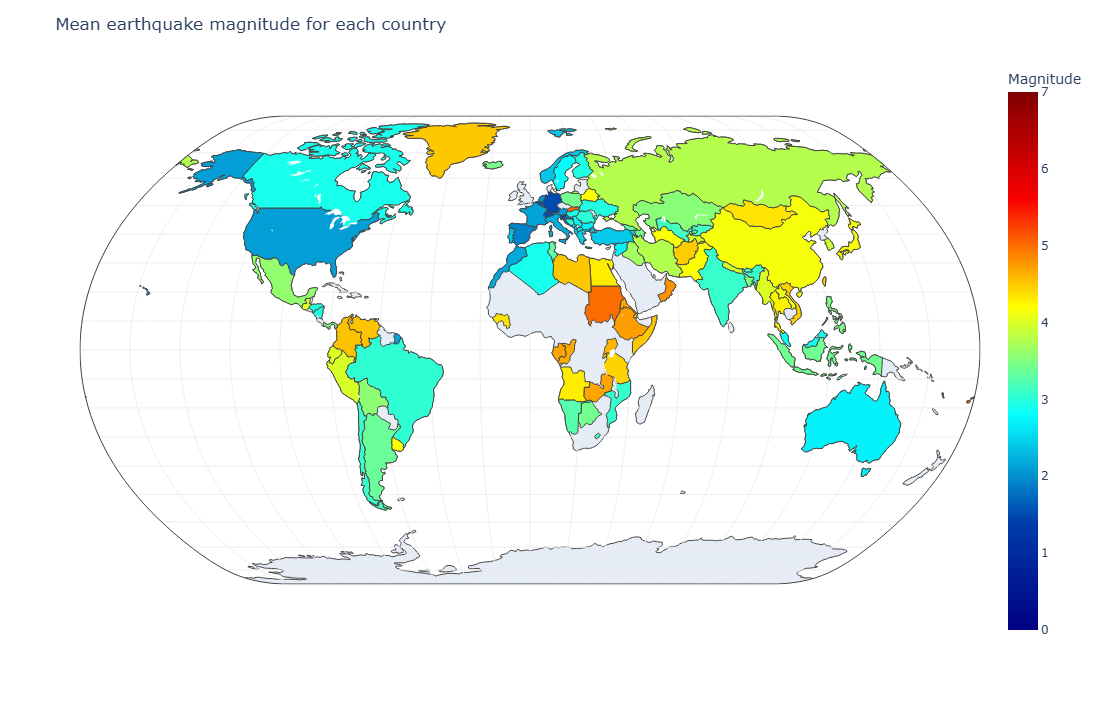

In [55]:
fig2 = px.choropleth(df_mean_magnitude,
    locations="Country",
    locationmode="country names",
    color = "Magnitude",
    hover_name = "Country",
    color_continuous_scale=px.colors.sequential.Jet,
    range_color=[0, 7])
layout = go.Layout(
    title= "Mean earthquake magnitude for each country",
    xaxis_title =  "Longitude",
    yaxis_title =  "Latitude",
    width=1024, 
    height=720,
    geo=dict(
            showframe=True,            # Mostrar marco del mapa
            projection_type='natural earth',  # Tipo de proyección
            lataxis=dict(showgrid=True, dtick=10),  # Grid de latitud cada 10°
            lonaxis=dict(showgrid=True, dtick=20)   # Grid de longitud cada 20°)
    ))
fig2.update_layout(layout)

In [56]:
# Para ver las paletas de colores. Nota: También existen otras paletas
# px.colors.sequential.swatches_continuous()

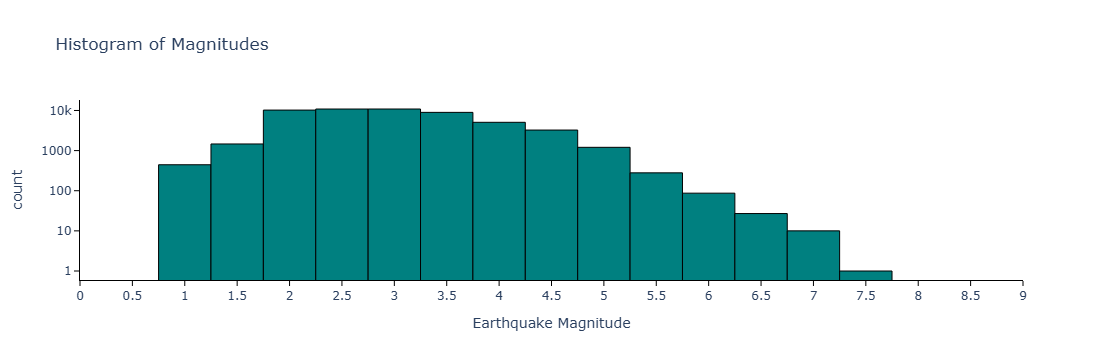

In [85]:
# Gráfico de Barras: Un gráfico de barras que muestre el número de terremotos por magnitud.
# Supongamos que quieres un histograma de la columna "Magnitude"
fig3 = px.histogram(df, x="Magnitude", 
                   nbins=20,  # número de bins (opcional)
                   title="Histogram of Magnitudes",
                   labels={"Magnitude": "Earthquake Magnitude"})  # etiquetas
fig3.update_yaxes(type="log",
                  showline=True, linecolor='black',  # eje Y negro
                  showticklabels=True, tickcolor='black', ticks='outside')
fig3.update_xaxes(range=[0, 9], 
                  dtick=0.5,
                  showline=True, linecolor='black',  # eje X negro
                  showticklabels=True, tickcolor='black', ticks='outside')

fig3.update_traces(marker_color="teal")
fig3.update_traces(marker_line_width=1, marker_line_color='black')
fig3.update_layout(plot_bgcolor='white') 
fig3.show()

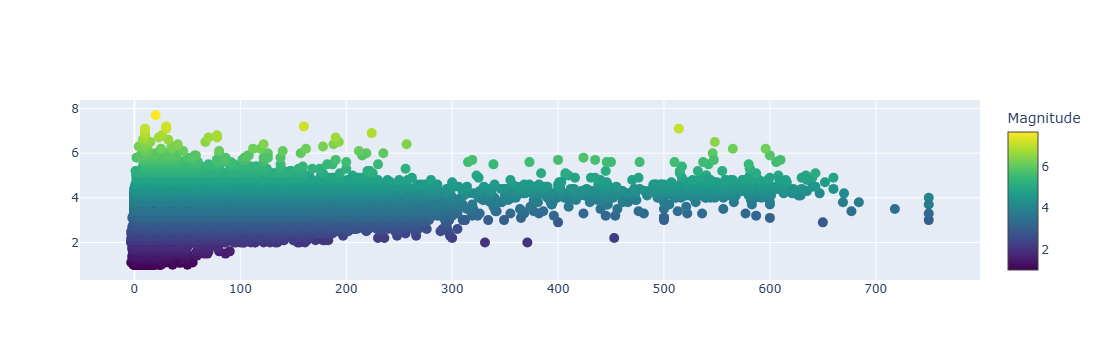

In [102]:
# Gráfico de Dispersión: Un gráfico de dispersión que muestre la relación entre la magnitud de los terremotos y su profundidad
fig4 = go.Figure(go.Scatter(
                x=df["Depth"],
                y=df["Magnitude"],
                mode="markers",
                marker=dict(
                    size=10,
                    color=df["Magnitude"],
                    colorscale="viridis",
                    showscale= True,
                    colorbar=dict(title="Magnitude"),
                )))

fig4

In [105]:
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Dashboard de terremotos"),
    dcc.Graph(id="Ubicacion-sismos",figure=fig1),
    dcc.Graph(id="mapa-coropletico",figure=fig2),
    dcc.Graph(id="histograma",figure=fig3),
    dcc.Graph(id="scatter-magnitud-profundidad",figure=fig4),
])
if __name__ == "__main__":
    app.run_server(debug=True)